<a href="https://colab.research.google.com/github/Victorbenavides/Arima_Series_De_Tiempo/blob/main/Modelo_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt#para generar graficos
import numpy as np#para arreglos y funciones matematicas
import pandas as pd#para leer y escribir datos
import statsmodels.api as sm#para explorar datos con modelos estadisticos

In [ ]:
import statsmodels
from statsmodels.tsa.arima_model import ARIMA#univariate method
from statsmodels.tsa.arima_model import ARIMAResults#aplica el modelo arima para  tiempos de serie
from statsmodels.tsa.stattools import adfuller

In [ ]:
mydata = pd.read_csv('MuertesAnuales.csv')#se guardan los datos con mydata usando la funcion de pandas
print(mydata)#se imprime el datasets

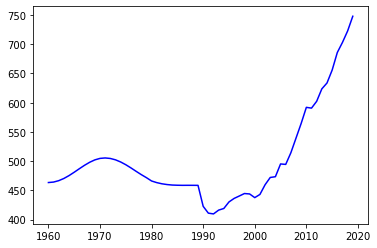

In [ ]:
plt.figure(1)#se crea espacio para la figura 1
x_year=mydata.iloc[:,0]#se seleccionan los datos de entrada con iloc
#select
y_value=mydata.iloc[:,1]#seleccion de datos de salida con iloc
plt.plot(x_year, y_value, color = 'blue', label = 'Original')#se crea la grafica en base a xyear y yvalue con color azul y etiqueta en original

In [ ]:
del mydata["Año"]#se elimina la columna 1, que serian los años
print(mydata)#se muestran los resultados

    Muertes
0   463.461
1   464.280
2   466.668
3   470.432
4   475.358
5   481.082
6   487.107
7   492.946
8   498.123
9   502.200
10  504.740
11  505.499
12  504.624
13  502.300
14  498.631
15  493.911
16  488.468
17  482.652
18  477.004
19  471.794
20  466.103
21  463.334
22  461.325
23  460.014
24  459.167
25  458.847
26  458.682
27  458.738
28  458.701
29  458.644
30  422.803
31  411.131
32  409.814
33  416.335
34  419.074
35  430.278
36  436.321
37  440.437
38  444.665
39  443.950
40  437.667
41  443.127
42  459.687
43  472.140
44  473.417
45  495.240
46  494.471
47  514.420
48  539.530
49  564.673
50  592.018
51  590.693
52  602.354
53  623.599
54  633.641
55  655.688
56  685.766
57  703.047
58  722.611
59  747.784


In [ ]:
mydata.index = pd.Index(sm.tsa.datetools.dates_from_range("1960", "2019"))#convierte los indices de numeros a series de tiempo
mydata.index.freq = mydata.index.inferred_freq#muestra la frecuencia en base a las series de tiempo
print(mydata)#se imprimen los datos actuales

            Muertes
1960-12-31  463.461
1961-12-31  464.280
1962-12-31  466.668
1963-12-31  470.432
1964-12-31  475.358
1965-12-31  481.082
1966-12-31  487.107
1967-12-31  492.946
1968-12-31  498.123
1969-12-31  502.200
1970-12-31  504.740
1971-12-31  505.499
1972-12-31  504.624
1973-12-31  502.300
1974-12-31  498.631
1975-12-31  493.911
1976-12-31  488.468
1977-12-31  482.652
1978-12-31  477.004
1979-12-31  471.794
1980-12-31  466.103
1981-12-31  463.334
1982-12-31  461.325
1983-12-31  460.014
1984-12-31  459.167
1985-12-31  458.847
1986-12-31  458.682
1987-12-31  458.738
1988-12-31  458.701
1989-12-31  458.644
1990-12-31  422.803
1991-12-31  411.131
1992-12-31  409.814
1993-12-31  416.335
1994-12-31  419.074
1995-12-31  430.278
1996-12-31  436.321
1997-12-31  440.437
1998-12-31  444.665
1999-12-31  443.950
2000-12-31  437.667
2001-12-31  443.127
2002-12-31  459.687
2003-12-31  472.140
2004-12-31  473.417
2005-12-31  495.240
2006-12-31  494.471
2007-12-31  514.420
2008-12-31  539.530


Text(0.5, 1.0, 'Rolling Mean & Rolling Standard Deviation')

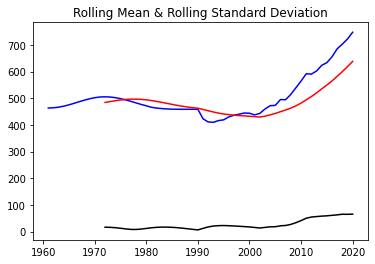

In [ ]:
plt.figure(2)#se crea figura 2
#---------
#CHECK STATIONARITY
rolling_mean = mydata.rolling(window = 12).mean()#Se obtiene la media de los datos
rolling_std = mydata.rolling(window = 12).std()#desviacion estandar de los datos
plt.plot(mydata, color = 'blue', label = 'Original')#se grafica con color azul y etiqueta original
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')#se grafica la media con color rojo y rolling mean
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')#se grafica la desviacion estandar con color negro y rolling std
plt.title('Rolling Mean & Rolling Standard Deviation')#titulo de grafico
#Si media esta cambiando -> Proceso no estacionario

In [ ]:
result = adfuller(mydata["Muertes"])#se usan los datos muertes del dataset
print('ADF Statistic: {}'.format(result[0]))#se muestran los resultados del adf
print('p-value: {}'.format(result[1]))# se imprimen los p valores
print('Critical Values:') #se imprimen los valores criticos
for key, value in result[4].items():
  print('\t{}:{}'.format(key, value))
  #Si p-value> 0.05 -> proceso no estacionario
  #

ADF Statistic: 2.152502737592038
p-value: 0.9988410941341834
Critical Values:
	1%:-3.548493559596539
	5%:-2.912836594776334
	10%:-2.594129155766944


const            501.488168
ar.L1.Muertes      1.695037
ar.L2.Muertes     -0.695037
dtype: float64
1960-12-31    501.488168
1961-12-31    463.461000
1962-12-31    464.849236
1963-12-31    468.327750
1964-12-31    473.048122
1965-12-31    478.781755
1966-12-31    485.060395
1967-12-31    491.294601
1968-12-31    497.004324
1969-12-31    501.721209
1970-12-31    505.033668
1971-12-31    506.505395
1972-12-31    506.026533
1973-12-31    504.015842
1974-12-31    500.684733
1975-12-31    496.080907
1976-12-31    490.630423
1977-12-31    484.684911
1978-12-31    478.609662
1979-12-31    473.078428
1980-12-31    468.172855
1981-12-31    462.147542
1982-12-31    461.409441
1983-12-31    459.928670
1984-12-31    459.102806
1985-12-31    458.578303
1986-12-31    458.624588
1987-12-31    458.567319
1988-12-31    458.776922
1989-12-31    458.675284
1990-12-31    458.604383
1991-12-31    397.892161
1992-12-31    403.018523
1993-12-31    408.898636
1994-12-31    420.867340
1995-12-31    420.977708
1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


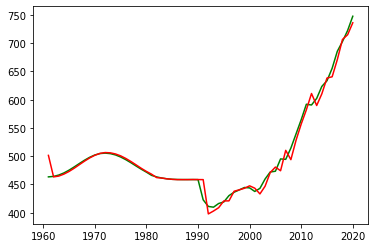

In [ ]:
model=ARIMA(mydata,order=(2, 0, 0)). fit() #se implementa el modelo arima
print(model.params) #se muestran los parametros del modelo
print(model.fittedvalues) #se muestras los valores ajustados
plt.figure(3)#se crea la figura 3
plt.plot(mydata, color = 'green', label = 'Original') #especificacion de colores de los valores de graficos
plt.plot(model.fittedvalues, color = 'red', label = 'Fitted') #especificacion de color de los valores ajustados
predicted_values = model.predict("2019", "2023") #se muestran los valores predictivos del modelo predictivo

2019-12-31    736.208713
2020-12-31    765.280178
2021-12-31    777.440678
2022-12-31    785.892680
2023-12-31    791.767138
Freq: A-DEC, dtype: float64


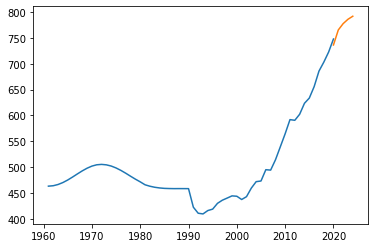

In [ ]:
print(predicted_values)#se muestran los valores predictivos
plt.figure(4)#se crea la figura 4
plt.plot(mydata)#se grafica my data
plt.plot(predicted_values)#se grafican los valores predictivos
plt.show()#interfaz similar a MATLAB